In [154]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [155]:
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(600,600), batch_size=8, label_mode='categorical')

Found 14100 files belonging to 7 classes.


In [156]:
data_iterator = data.as_numpy_iterator()

In [157]:
batch = data_iterator.next()

In [158]:
batch[0].shape

(8, 600, 600, 3)

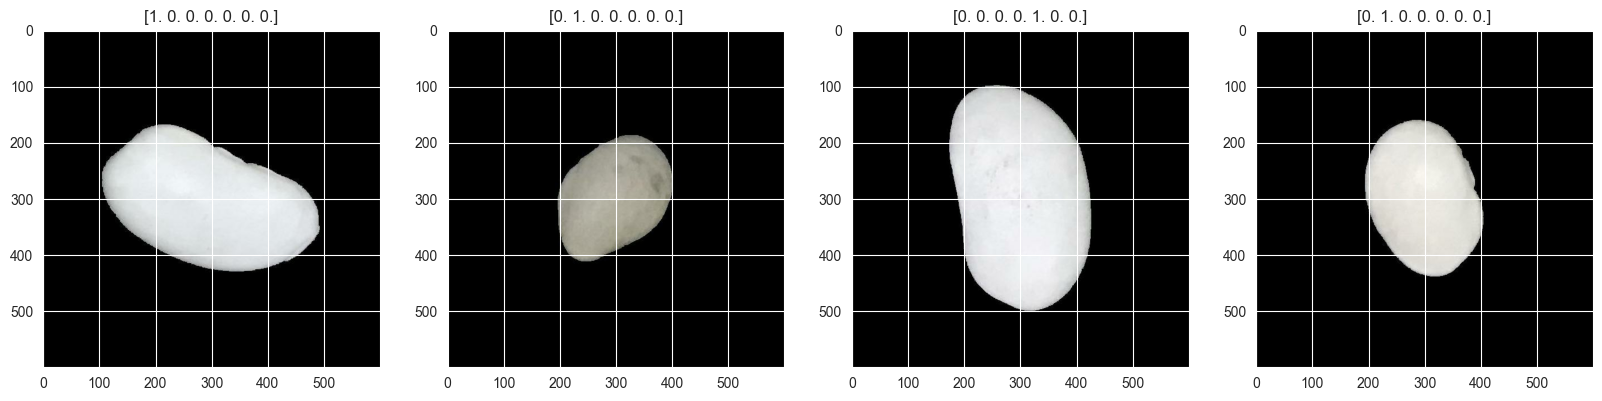

In [159]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale Data

In [160]:
# data = data.map(lambda x, y: (x, tf.one_hot(y, depth=7)))

In [161]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

Split Data

In [162]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [163]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Model

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [171]:
model = Sequential()

In [172]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(600, 600, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=7, activation='softmax'))

In [173]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [174]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 600, 600, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 300, 300, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 300, 300, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 150, 150, 64)     0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1440000)           0         
                                                                 
 dense_14 (Dense)            (None, 7)                

Train

In [ ]:
logdir = 'logs'
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensor_callback])

Epoch 1/20
 719/1234 [================>.............] - ETA: 27s - loss: 11.5008 - accuracy: 0.6471

Plot performance

AttributeError: 'TakeDataset' object has no attribute 'shape'